# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 627


In [12]:
#cities

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

#rest of url is: 

#my API Key 
api_key = weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes. % is modulo operator
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={api_key}"
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | papatowai
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | wynyard
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | aroma
Processing Record 7 of Set 1 | nova sintra
Processing Record 8 of Set 1 | kainan
Processing Record 9 of Set 1 | cabo san lucas
Processing Record 10 of Set 1 | hawaiian paradise park
Processing Record 11 of Set 1 | weno
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | kununurra
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | peace river
Processing Record 19 of Set 1 | atafu village
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | taiohae
City not found. Skipp

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          598
Lat           598
Lng           598
Max Temp      598
Humidity      598
Cloudiness    598
Wind Speed    598
Country       598
Date          598
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,282.49,80,80,1.79,NZ,1692948492
1,papatowai,-46.5619,169.4708,282.28,95,88,0.62,NZ,1692948521
2,edinburgh of the seven seas,-37.0676,-12.3116,287.46,97,100,7.92,SH,1692948489
3,wynyard,-41.0000,145.7167,283.67,63,13,4.81,AU,1692948553
4,puerto natales,-51.7236,-72.4875,271.55,92,92,0.66,CL,1692948553


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,282.49,80,80,1.79,NZ,1692948492
1,papatowai,-46.5619,169.4708,282.28,95,88,0.62,NZ,1692948521
2,edinburgh of the seven seas,-37.0676,-12.3116,287.46,97,100,7.92,SH,1692948489
3,wynyard,-41.0000,145.7167,283.67,63,13,4.81,AU,1692948553
4,puerto natales,-51.7236,-72.4875,271.55,92,92,0.66,CL,1692948553


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

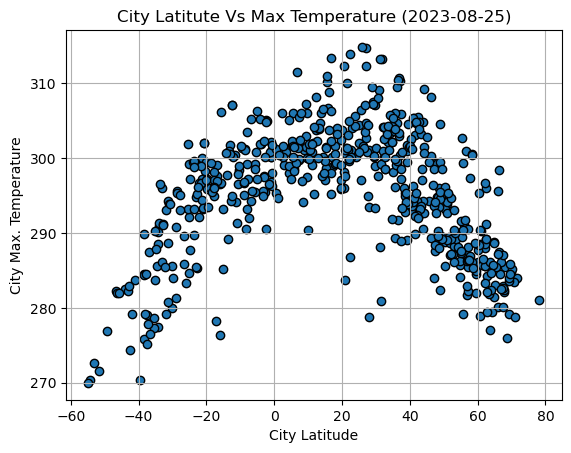

In [21]:
# Build scatter plot for latitude vs. temperature
x_value = city_data_df['Lat']
y_value = city_data_df['Max Temp']

#create scatter plot
plt.scatter(x_value, y_value, edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitute Vs Max Temperature (2023-08-25)')
plt.xlabel('City Latitude')
plt.ylabel('City Max. Temperature')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

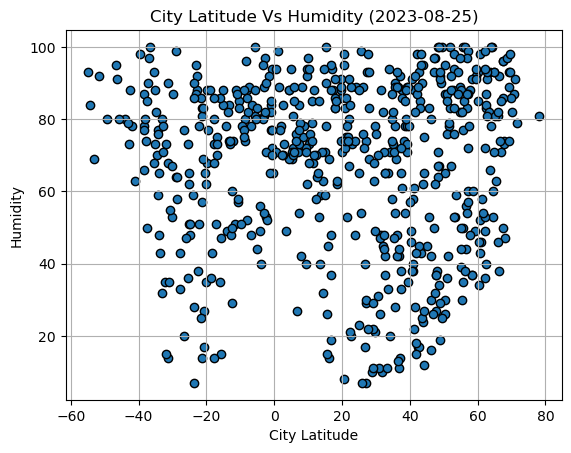

In [22]:
# Build the scatter plots for latitude vs. humidity
hum_value = city_data_df['Humidity']
plt.scatter(x_value, hum_value, edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude Vs Humidity (2023-08-25)')
plt.xlabel('City Latitude')
plt.ylabel('Humidity')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

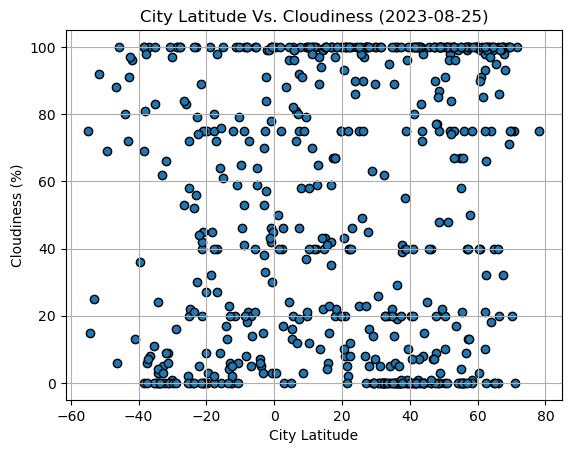

In [25]:
# Build the scatter plots for latitude vs. cloudiness
cloud_value = city_data_df['Cloudiness']
plt.scatter(x_value, cloud_value, edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude Vs. Cloudiness (2023-08-25)')
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

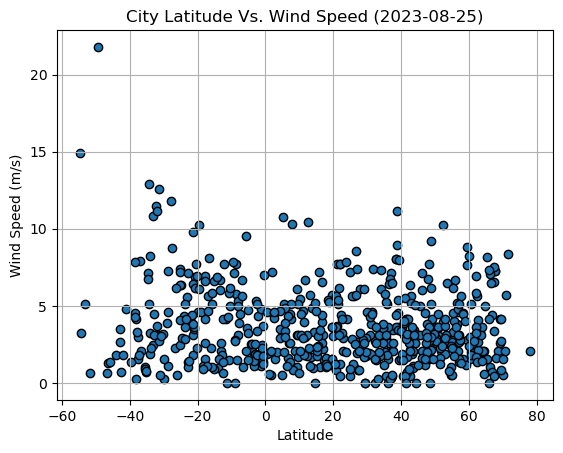

In [26]:
# Build the scatter plots for latitude vs. wind speed
wind_value = city_data_df['Wind Speed']
plt.scatter(x_value, wind_value, edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude Vs. Wind Speed (2023-08-25)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [37]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, title, x_label, y_label, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.scatter(x, y, edgecolor='black')
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq, text_coordinates, fontsize=12, color='red')
    
    #Add titles and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    print(f'The r-value is: {rvalue}')
    plt.show()


In [38]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,aroma,15.8167,36.1333,306.71,45,6,7.19,SD,1692948554
6,nova sintra,14.8667,-24.7167,297.13,71,43,2.26,CV,1692948554
7,kainan,34.1500,135.2000,303.42,71,5,6.12,JP,1692948485
8,cabo san lucas,22.8909,-109.9124,303.99,73,46,2.90,MX,1692948302
9,hawaiian paradise park,19.5933,-154.9731,295.88,86,75,1.54,US,1692948483


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,282.49,80,80,1.79,NZ,1692948492
1,papatowai,-46.5619,169.4708,282.28,95,88,0.62,NZ,1692948521
2,edinburgh of the seven seas,-37.0676,-12.3116,287.46,97,100,7.92,SH,1692948489
3,wynyard,-41.0000,145.7167,283.67,63,13,4.81,AU,1692948553
4,puerto natales,-51.7236,-72.4875,271.55,92,92,0.66,CL,1692948553


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6894356882536042


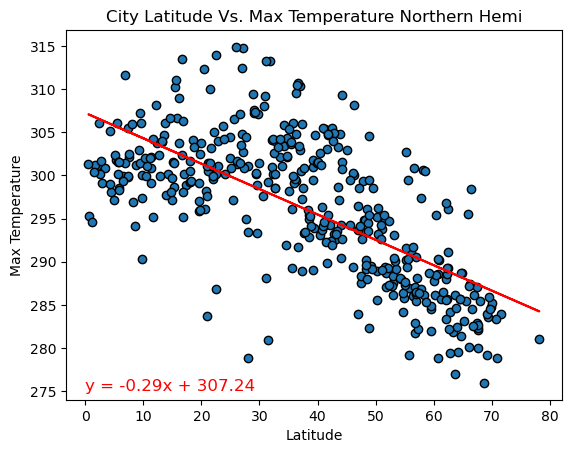

In [47]:
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'City Latitude Vs. Max Temperature Northern Hemi', 'Latitude', 'Max Temperature', (0, 275))

The r-value is: 0.7740533337722129


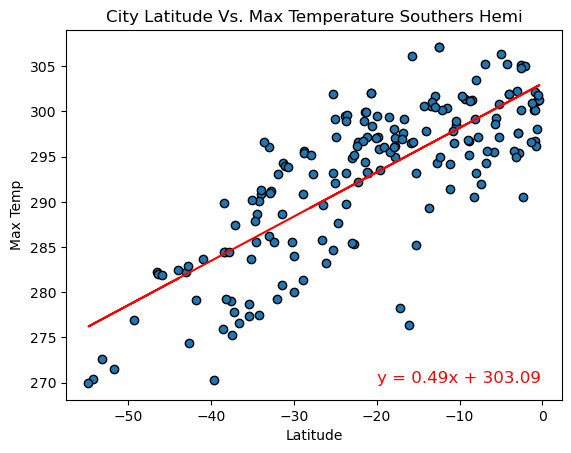

In [49]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'City Latitude Vs. Max Temperature Southern Hemi', 'Latitude', 'Max Temp', (-20,270))

**Discussion about the linear relationship:** 

- In the **Northern Hemisphere**, latitude has a strong inversed linear relationship with max temperatures. As latitude increases, we can expect temperatures to decrease. 

- In the **Southern Hemisphere**, there's a reasonably strong positive relationship between latitude and maximum temperature. As latitude increases (i.e., closer to equator), you can expect the maximum temperature to generally be higher.the r-value at 0.7740 suggest a moderately strong positive linear relatiship between these two variables. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.04208514153885208


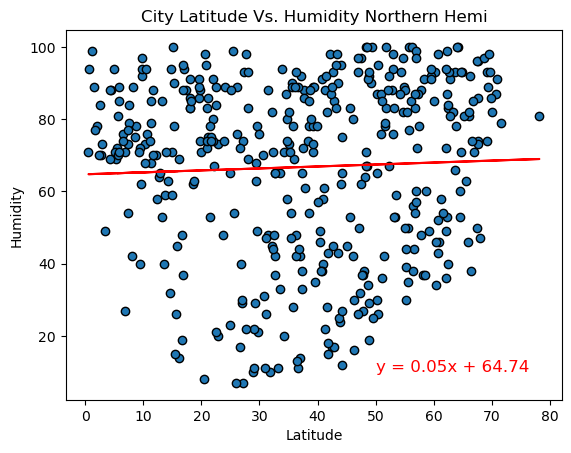

In [57]:
# Northen Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'City Latitude Vs. Humidity Northern Hemi', 'Latitude', 'Humidity', (50, 10))

The r-value is: -0.003997062414461014


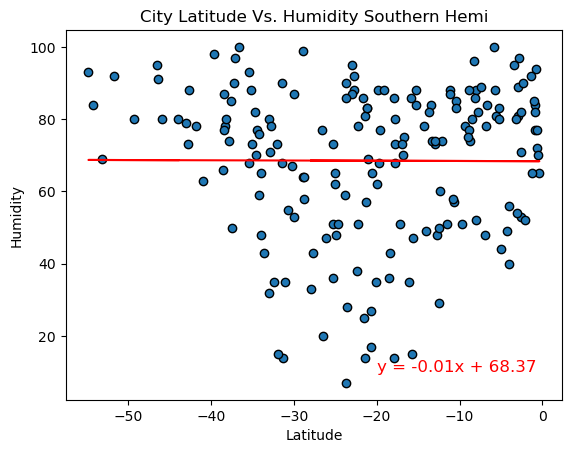

In [55]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'City Latitude Vs. Humidity Southern Hemi', 'Latitude', 'Humidity', (-20,10))

**Discussion about the linear relationship:**

- There seems to be a weak linear correlation between latitude and humidity for cities both in the **southern and northern hemisphere**. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06805932035846944


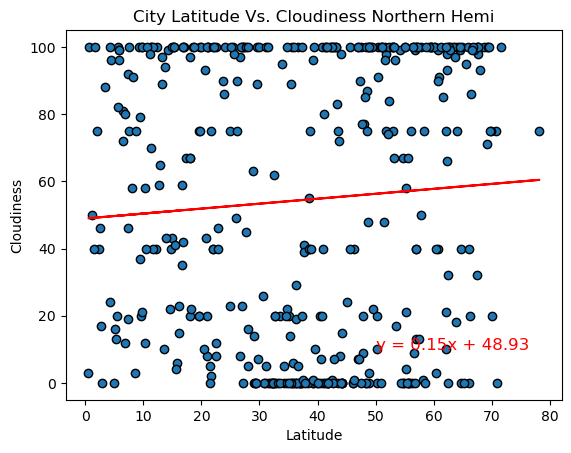

In [58]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'City Latitude Vs. Cloudiness Northern Hemi', 'Latitude', 'Cloudiness', (50, 10))

The r-value is: 0.031835640790783146


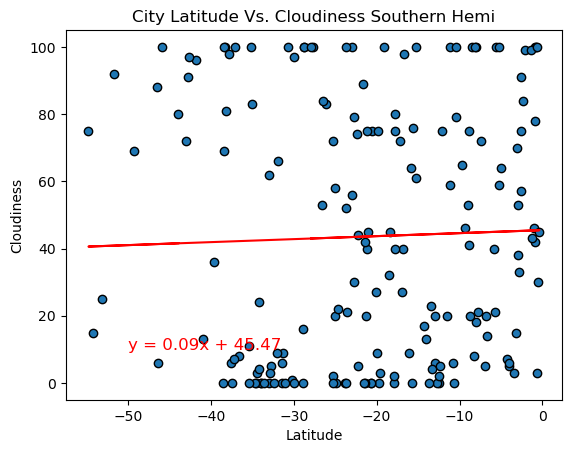

In [65]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'City Latitude Vs. Cloudiness Southern Hemi', 'Latitude', 'Cloudiness', (-50, 10))

**Discussion about the linear relationship:** 

- Latitude seems to be a weak predictor of city cloudiness for both the **Northern and Southern Hemispheres**. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.004517864376077977


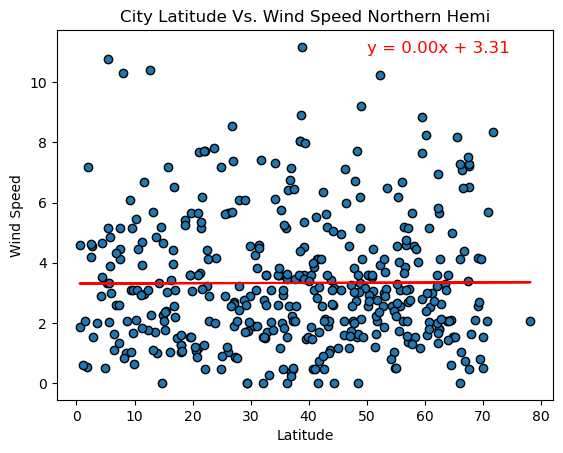

In [67]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'City Latitude Vs. Wind Speed Northern Hemi', 'Latitude', 'Wind Speed', (50, 11))

The r-value is: -0.1566156130861761


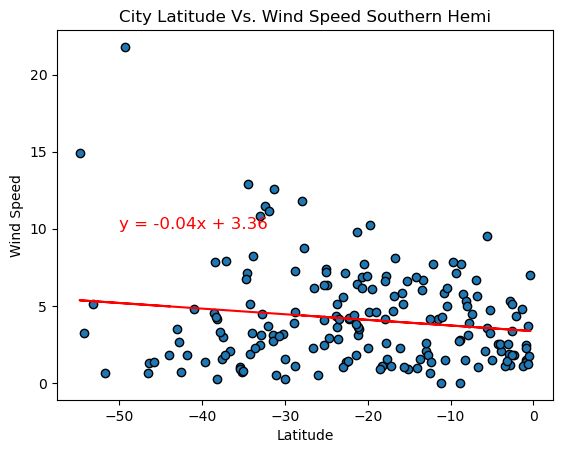

In [68]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'City Latitude Vs. Wind Speed Southern Hemi', 'Latitude', 'Wind Speed', (-50, 10))

**Discussion about the linear relationship:**

- Based on this dataset, in the **Northern Hemisphere** we observe virtually no linear correlation between latitude and wind speeds. 

- In the **Southern Hemisphere** the linear correlation is inverted or negative but significantly weak.

**Conclusion:** Latitude seems to be a weak predictor of wind speed in both hemispheres 
